In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../../data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()   # LabelEncoder ==> https://blog.csdn.net/quintind/article/details/79850455
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:   # unique() ==> https://blog.csdn.net/starter_____/article/details/79184196
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
# 如果 app_train["DAYS_EMPLOYED"] == 365243, 則 app_train['DAYS_EMPLOYED_ANOM'] = True, 不然則為 False
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243   
# df.replace({原值, 新值}, inplace = True) ==> https://zhuanlan.zhihu.com/p/30829387
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [3]:
app_train.corr()['TARGET']

SK_ID_CURR                                 -0.002108
TARGET                                      1.000000
NAME_CONTRACT_TYPE                         -0.030896
FLAG_OWN_CAR                               -0.021851
FLAG_OWN_REALTY                            -0.006148
CNT_CHILDREN                                0.019187
AMT_INCOME_TOTAL                           -0.003982
AMT_CREDIT                                 -0.030369
AMT_ANNUITY                                -0.012817
AMT_GOODS_PRICE                            -0.039645
REGION_POPULATION_RELATIVE                 -0.037227
DAYS_BIRTH                                 -0.078239
DAYS_EMPLOYED                               0.074958
DAYS_REGISTRATION                           0.041975
DAYS_ID_PUBLISH                             0.051457
OWN_CAR_AGE                                 0.037612
FLAG_MOBIL                                  0.000534
FLAG_EMP_PHONE                              0.045982
FLAG_WORK_PHONE                             0.

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [4]:
# 取得 TARGET 與其他欄位的相關係數 (去除自己 TARGET), 並按升序排列
df_target_corr = pd.DataFrame(app_train.corr()['TARGET'])
df_target_corr = df_target_corr[df_target_corr['TARGET'] != 1]

print('The Correlation Coefficient between \'TARGET\' to other columns (order by corr asc)')
df_target_corr

The Correlation Coefficient between 'TARGET' to other columns (order by corr asc)


,TARGET
SK_ID_CURR,-0.002108
NAME_CONTRACT_TYPE,-0.030896
FLAG_OWN_CAR,-0.021851
FLAG_OWN_REALTY,-0.006148
CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,-0.003982
AMT_CREDIT,-0.030369
AMT_ANNUITY,-0.012817
AMT_GOODS_PRICE,-0.039645
REGION_POPULATION_RELATIVE,-0.037227


In [5]:
# 最小的 15 個相關係數
df_target_corr = df_target_corr.sort_values('TARGET',ascending=True)

print('The minimum 15 correction coefficient')
df_target_corr.head(15)

The minimum 15 correction coefficient


,TARGET
EXT_SOURCE_3,-0.178919
EXT_SOURCE_2,-0.160472
EXT_SOURCE_1,-0.155317
DAYS_BIRTH,-0.078239
NAME_EDUCATION_TYPE_Higher education,-0.056593
CODE_GENDER_F,-0.054704
NAME_INCOME_TYPE_Pensioner,-0.046209
ORGANIZATION_TYPE_XNA,-0.045987
DAYS_EMPLOYED_ANOM,-0.045987
FLOORSMAX_AVG,-0.044003


In [6]:
# 最大的 15 個相關係數
df_target_corr = df_target_corr.sort_values('TARGET',ascending=False)

print('The maximum 15 correction coefficient')
df_target_corr.head(15)

The maximum 15 correction coefficient


,TARGET
DAYS_EMPLOYED,0.074958
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
NAME_INCOME_TYPE_Working,0.057481
DAYS_LAST_PHONE_CHANGE,0.055218
CODE_GENDER_M,0.054713
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special,0.049824
FLAG_EMP_PHONE,0.045982


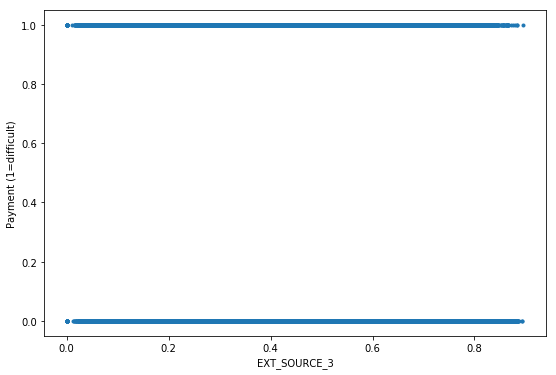

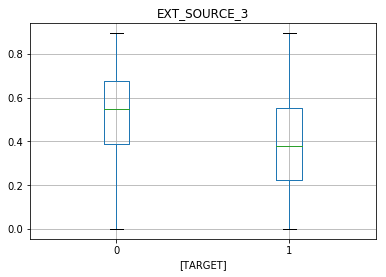

Correlation: -0.1789


In [7]:
# TARGET vs EXT_SOURCE_3 ==> r = -0.178919

# EXT_SOURCE_3 觀察有沒有異常值
# display(app_train.groupby(['EXT_SOURCE_3']).size())

# 根據 groupby 中得知 0.000527 是個極端值, 同時欄位如果有值是空白及 nan ==> 去除
sub_df = app_train[(app_train['EXT_SOURCE_3'] != 0.000527) & (app_train['EXT_SOURCE_3'].notnull()) & (app_train['EXT_SOURCE_3'] != np.nan)]

# 畫散布圖
plt.figure(figsize=(9,6)) # 設置圖形尺寸大小 plt.figure(width, height)
plt.plot(sub_df['EXT_SOURCE_3'], sub_df['TARGET'], '.')  #plt.plot(x, y, linestyle), '.'==> 代表繪製點線
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('Payment (1=difficult)')
plt.show()

# 畫箱形圖
sub_df.boxplot(column=['EXT_SOURCE_3'], by = ['TARGET'], showfliers = False)   # showfliers=True(默認) ==> 是否顯示異常值
plt.suptitle('')
plt.show()

# 關係係數
corr = np.corrcoef(sub_df['TARGET'], sub_df['EXT_SOURCE_3'])
print("Correlation: %.4f" % (corr[0][1]))

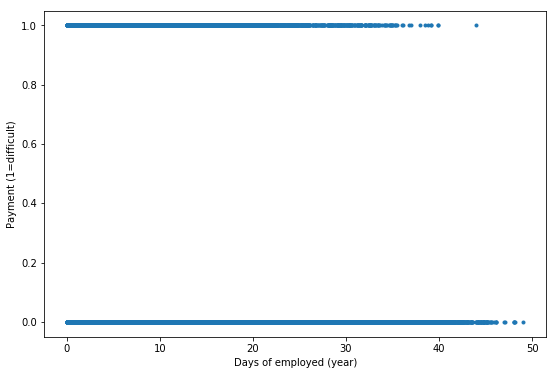

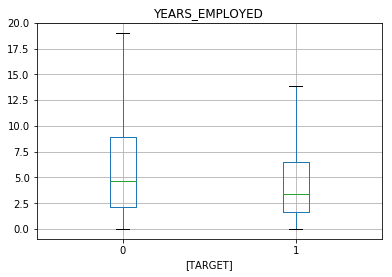

Correlation: 0.0750


In [11]:
# TARGET vs DAYS_EMPLOYED ==> r = 0.074958

# DAYS_EMPLOYED 觀察有沒有異常值
# display(app_train.groupby(['DAYS_EMPLOYED']).size())

# 欄位中如果有值是空白及 nan ==> 去除
sub_df = app_train[(app_train['DAYS_EMPLOYED'] != 0.000527) & (~app_train['DAYS_EMPLOYED'].isnull()) & (app_train['DAYS_EMPLOYED'] != np.nan)]

# 畫散布圖
plt.figure(figsize=(9,6)) 
plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['TARGET'], '.')  
plt.xlabel('Days of employed (year)')
plt.ylabel('Payment (1=difficult)')
plt.show()

# 畫箱形圖
sub_df.loc[:,'YEARS_EMPLOYED'] = sub_df['DAYS_EMPLOYED'].apply(lambda x: x / (-365))
sub_df.boxplot(column=['YEARS_EMPLOYED'], by = ['TARGET'], showfliers = False) 
plt.suptitle('')
plt.show()

# 關係係數
corr = np.corrcoef(sub_df['TARGET'], sub_df['DAYS_EMPLOYED'])
print("Correlation: %.4f" % (corr[0][1]))

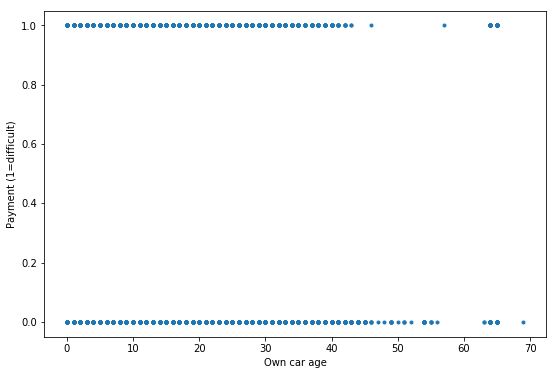

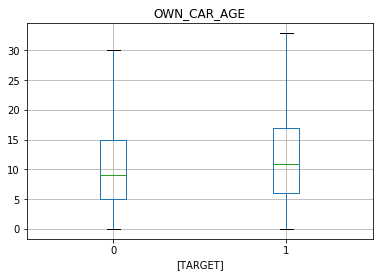

Correlation: 0.0374


In [9]:
# TARGET vs OWN_CAR_AGE ==> 0.037612
 
# OWN_CAR_AGE 觀察有沒有異常值
# display(app_train.groupby(['OWN_CAR_AGE']).size())

# 根據 groupby 中得知 91 是個極端值, 同時欄位如果有值是空白及 nan ==> 去除
sub_df = app_train[(app_train['OWN_CAR_AGE'] != 91) & (~app_train['OWN_CAR_AGE'].isnull()) & (app_train['OWN_CAR_AGE'] != np.nan)]


# 畫散布圖
plt.figure(figsize=(9,6)) 
plt.plot(sub_df['OWN_CAR_AGE'], sub_df['TARGET'], '.') 
plt.xlabel('Own car age')
plt.ylabel('Payment (1=difficult)')
plt.show()

# 畫箱形圖
sub_df.boxplot(column=['OWN_CAR_AGE'], by = ['TARGET'], showfliers = False) 
plt.suptitle('')
plt.show()

# 關係係數
corr = np.corrcoef(sub_df['TARGET'], sub_df['OWN_CAR_AGE'])
print("Correlation: %.4f" % (corr[0][1]))

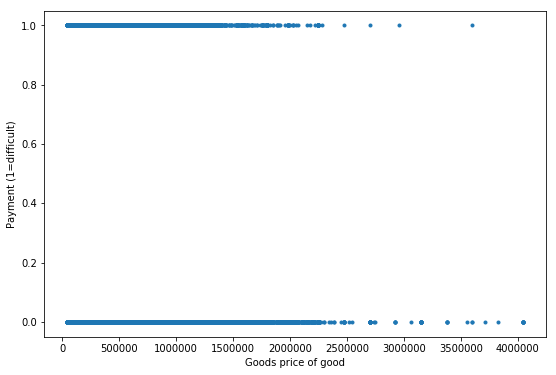

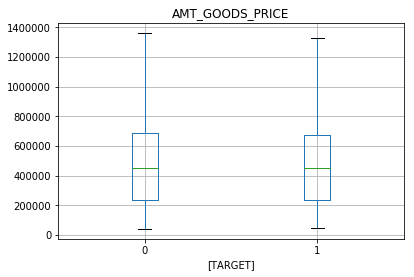

Correlation: -0.0396


In [10]:
# TARGET vs AMT_GOODS_PRICE ==> -0.039645
 
# AMT_GOODS_PRICE 觀察有沒有異常值
# display(app_train.groupby(['AMT_GOODS_PRICE']).size())

# 欄位如果有值是空白及 nan ==> 去除
sub_df = app_train[(~app_train['AMT_GOODS_PRICE'].isnull()) & (app_train['AMT_GOODS_PRICE'] != np.nan)]


# 畫散布圖
plt.figure(figsize=(9,6)) 
plt.plot(sub_df['AMT_GOODS_PRICE'], sub_df['TARGET'], '.') 
plt.xlabel('Goods price of good')
plt.ylabel('Payment (1=difficult)')
plt.show()

# 畫箱形圖
sub_df.boxplot(column=['AMT_GOODS_PRICE'], by = ['TARGET'], showfliers = False) 
plt.suptitle('')
plt.show()

# 關係係數
corr = np.corrcoef(sub_df['TARGET'], sub_df['AMT_GOODS_PRICE'])
print("Correlation: %.4f" % (corr[0][1]))